In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
df = pd.read_csv("psl_formated.csv")

In [71]:
df['team_1'].unique()

array(['Islamabad United', 'Lahore Qalandars', 'Peshawar Zalmi',
       'Karachi Kings', 'Quetta Gladiators', 'Multan Sultans'],
      dtype=object)

# Boundries Count

In [32]:
boundries_df =df.groupby(['psl_year']).agg(
    fours = ('is_four','sum'),
    sixes = ('is_six','sum'),
    matches = ('match_number','max')
    
)

In [40]:
boundries_df = boundries_df.reset_index()

In [131]:
boundries_df

,psl_year,fours,sixes,matches,fours_per_match,six_per_match
0,2016,566,247,24,23.583333,10.291667
1,2017,552,258,24,23.000000,10.750000
2,2018,774,414,34,22.764706,12.176471
3,2019,878,374,34,25.823529,11.000000
4,2020,873,383,34,25.676471,11.264706


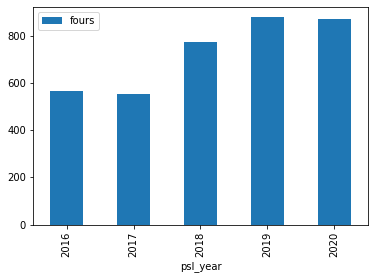

In [134]:
ax =boundries_df.plot('psl_year', 'fours', kind='bar')

In [139]:
fig = ax.get_figure()
fig.savefig('fours.jpg',dpi=100,bbox_inches='tight')

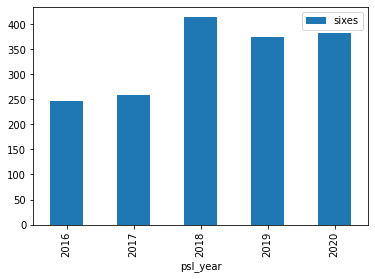

In [140]:
ax = boundries_df.plot('psl_year', 'sixes', kind='bar')
fig = ax.get_figure()
fig.savefig('sixes.jpg',dpi=100,bbox_inches='tight')

In [45]:
boundries_df['fours_per_match'] = boundries_df['fours']/boundries_df['matches']
boundries_df['six_per_match'] = boundries_df['sixes']/boundries_df['matches']

In [46]:
boundries_df

,psl_year,fours,sixes,matches,fours_per_match,six_per_match
0,2016,566,247,24,23.583333,10.291667
1,2017,552,258,24,23.000000,10.750000
2,2018,774,414,34,22.764706,12.176471
3,2019,878,374,34,25.823529,11.000000
4,2020,873,383,34,25.676471,11.264706


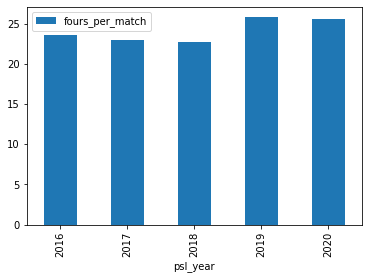

In [141]:
ax =boundries_df.plot('psl_year', 'fours_per_match', kind='bar')
fig = ax.get_figure()
fig.savefig('four_.jpg',dpi=100,bbox_inches='tight')

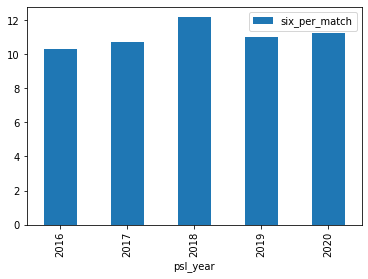

In [142]:
ax = boundries_df.plot('psl_year', 'six_per_match', kind='bar')
fig = ax.get_figure()
fig.savefig('six_.jpg',dpi=100,bbox_inches='tight')

# Wickets

In [51]:
df["wicket_text"].unique()

array([nan, 'caught', 'bowled', 'lbw', 'run out', 'stumped', 'hit wicket',
       'obstruct field'], dtype=object)

In [143]:
df['wicket_text'].value_counts()

caught            1147
bowled             328
run out            165
lbw                130
stumped             42
hit wicket           3
obstruct field       1
Name: wicket_text, dtype: int64

In [54]:
wickets = df['wicket_text'].value_counts()

In [147]:
wicket_dict = dict(wickets)
del_keys = []
others = 0
for key, value in wicket_dict.items():
    if value <100:
        others = others+value
        del_keys.append(key)
    

In [149]:
for del_key in del_keys:
    del(wicket_dict[del_key])

In [151]:
wicket_dict['others']= others

In [152]:
wicket_dict

{'caught': 1147, 'bowled': 328, 'run out': 165, 'lbw': 130, 'others': 46}

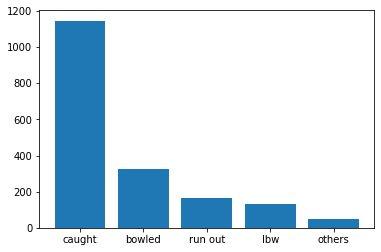

In [157]:
plt.bar(*zip(*wicket_dict.items()))
plt.savefig('wickets.png',dpi=400)

# Team Based Dataframes


In [74]:
teams_df = {'quetta' : df.loc[((df['team_1'] == "Quetta Gladiators") & (df['inning'] == 1)) | ((df['team_2'] == "Quetta Gladiators") & (df['inning'] == 2))],
'lahore' : df.loc[((df['team_1'] == "Lahore Qalandars") & (df['inning'] == 1)) | ((df['team_2'] == "Lahore Qalandars") & (df['inning'] == 2))],
'islamabad' : df.loc[((df['team_1'] == "Islamabad United") & (df['inning'] == 1)) | ((df['team_2'] == "Islamabad United") & (df['inning'] == 2))],
'peshawar' : df.loc[((df['team_1'] == "Peshawar Zalmi") & (df['inning'] == 1)) | ((df['team_2'] == "Peshawar Zalmi") & (df['inning'] == 2))],
'multan' : df.loc[((df['team_1'] == "Multan Sultans") & (df['inning'] == 1)) | ((df['team_2'] == "Multan Sultans") & (df['inning'] == 2))],
'karachi' : df.loc[((df['team_1'] == "Karachi Kings") & (df['inning'] == 1)) | ((df['team_2'] == "Karachi Kings") & (df['inning'] == 2))]
}

# Team Based Runs


In [86]:
team_runs = {}
for team_name, value in teams_df.items():
    team_runs[team_name] = value['runs'].sum()

In [93]:
team_matches = {}
for team_name , value in teams_df.items():
    team_matches[team_name] = value.groupby(['psl_year', 'match_number']).ngroups

In [159]:
team_runs

{'quetta': 7722,
 'lahore': 7325,
 'islamabad': 7988,
 'peshawar': 8632,
 'multan': 4404,
 'karachi': 7720}

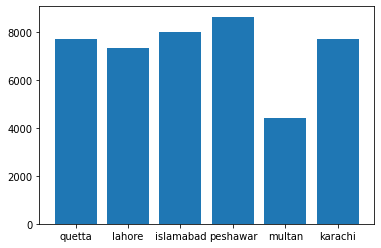

In [158]:
plt.bar(*zip(*team_runs.items()))
plt.savefig('runs.png',dpi=400)

In [98]:
team_runs_per_match ={}
for team_name, value in team_runs.items():
    team_runs_per_match[team_name]= value/team_matches[team_name]

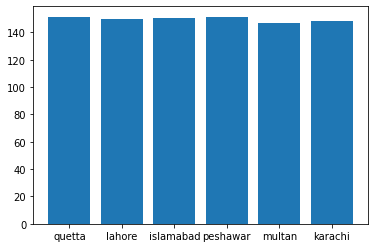

In [160]:
plt.bar(*zip(*team_runs_per_match.items()))
plt.savefig('runs_per_match.png',dpi=400)

# Teams based percentage runs in boundries

In [103]:
team_boundry_runs = {}
for team_name, value in teams_df.items():
    sixes = value['is_six'].sum()
    fours = value['is_four'].sum()
    team_boundry_runs[team_name]= (sixes*6)+(fours*4)

In [104]:
team_boundry_runs

{'quetta': 4232,
 'lahore': 4244,
 'islamabad': 4698,
 'peshawar': 4974,
 'multan': 2396,
 'karachi': 4084}

In [105]:
team_runs

{'quetta': 7722,
 'lahore': 7325,
 'islamabad': 7988,
 'peshawar': 8632,
 'multan': 4404,
 'karachi': 7720}

In [110]:
boundry_run_percentage = {}
for team, runs in team_runs.items():
    print (f"{team} scored {(team_boundry_runs[team]/runs)*100}% runs in boundries")
    boundry_run_percentage[team] = (team_boundry_runs[team]/runs)*100

quetta scored 54.80445480445481% runs in boundries
lahore scored 57.93856655290103% runs in boundries
islamabad scored 58.81321982974461% runs in boundries
peshawar scored 57.622798887859126% runs in boundries
multan scored 54.40508628519528% runs in boundries
karachi scored 52.90155440414508% runs in boundries


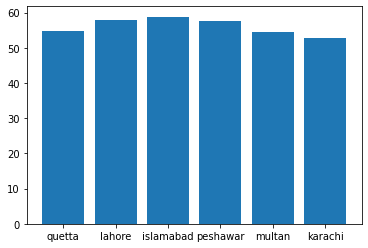

In [161]:
plt.bar(*zip(*boundry_run_percentage.items()))
plt.savefig('boundry_percentage.png',dpi=400)

# Dot Balls Played

In [118]:
dot_balls_played = {}
total_balls_played = {}
for team, value in teams_df.items():
    dot_balls_played[team]=value[value['runs']==0].shape[0]
    total_balls_played[team]= value.shape[0]

In [121]:
dot_ball_percentage ={}
for team , value in dot_balls_played.items():
    dot_ball_percentage[team] = (value/total_balls_played[team])*100

In [124]:
for team , value in dot_ball_percentage.items():
    print (f"Team : {team} played {value}% of dot balls")

Team : quetta played 34.13937867338371% of dot balls
Team : lahore played 36.852240896358545% of dot balls
Team : islamabad played 36.45076007931262% of dot balls
Team : peshawar played 36.53875094055681% of dot balls
Team : multan played 35.08415554265815% of dot balls
Team : karachi played 34.52535760728219% of dot balls


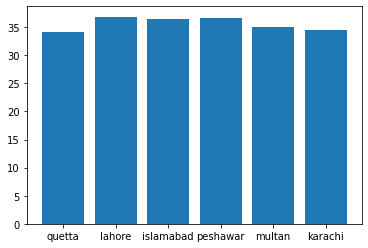

In [162]:
plt.bar(*zip(*dot_ball_percentage.items()))
plt.savefig('dot_balls.png',dpi=400)

# Six Hit Per Team

In [126]:
six_per_team = {}
for team, value in teams_df.items():
    six_per_team[team] = value['is_six'].sum()

In [127]:
six_per_team

{'quetta': 278,
 'lahore': 294,
 'islamabad': 339,
 'peshawar': 355,
 'multan': 152,
 'karachi': 258}

In [128]:
six_per_match ={}
for team ,value in six_per_team.items():
    six_per_match[team] = value/team_matches[team]

In [129]:
six_per_match

{'quetta': 5.450980392156863,
 'lahore': 6.0,
 'islamabad': 6.39622641509434,
 'peshawar': 6.228070175438597,
 'multan': 5.066666666666666,
 'karachi': 4.961538461538462}

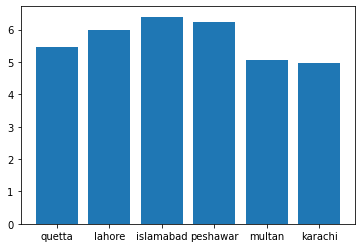

In [163]:
plt.bar(*zip(*six_per_match.items()))
plt.savefig('sixes_per_match.png',dpi=400)